# **Project Report**

# **SERUM CHOLESTROL AND MAXIMUM HEART RATE ACHIEVED TO DIAGNOSE HEART DISEASE PATIENTS FROM HUNGARY**

Aryan Jain, Vibhav Damani 

## INTRODUCTION

Cardiovascular disease encompasses a spectrum of cardiac conditions originating from malfunctions within the cardiac and vascular systems. Among these, coronary artery disease (CAD) manifests when the arteries responsible for supplying blood to the heart undergo a narrowing process. Numerous risk factors contribute to the predisposition for this malady, including elevated cholesterol levels and the maximum heart rate attained during physiological exertion.

Elevated cholesterol levels precipitate the accumulation of lipid deposits within the vasculature, impeding the smooth flow of blood through the arteries. The rupture of these deposits may culminate in the formation of a thrombus, thereby instigating severe cardiovascular events such as myocardial infarction or stroke. Notably, individuals afflicted by heart disease may experience a notable reduction in their maximum heart rate, as indicated by medical insights provided by WebMD in 2002.

In light of these considerations, the pertinent query arises: can the likelihood of an individual being afflicted by heart disease be ascertained based on an analysis of serum cholesterol levels and the maximum heart rate achieved? To address this question, we propose the utilization of a k-nearest neighbors (KNN) classifier algorithm, an analytical tool with demonstrated efficacy in pattern recognition and classification tasks. By employing this algorithm, we aim to discern discernible patterns and relationships between the aforementioned physiological parameters and the presence of heart disease in a new patient.

Our study involves the utilization of the "reprocessed.hungarian.data" dataset extracted from the Heart Disease Database for the predictive assessment of heart disease presence in patients from Hungary. The dataset comprises several pertinent variables, and our focus is on utilizing the variables "chol" (serum cholesterol level) and "thalach" (maximum heart rate achieved) as predictive features.

The specific columns within the dataset are defined as follows:

1. **age**: Age of the patient
2. **sex**: Gender of the patient (1 = male, 0 = female)
3. **cp**: Chest pain type
4. **trestbps**: Resting blood pressure in mmHg
5. **chol**: Serum cholesterol level in mg/dl
6. **fbs**: Fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **restecg**: Resting electrocardiographic results
8. **thalach**: Maximum heart rate achieved
9. **exang**: Whether exercise induced angina (1 = True, 0 = False)
10. **oldpeak**: ST depression induced by exercise, relative to rest
11. **slope**: The slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **ca**: Number of major vessels (0-3) colored by fluoroscopy
13. **thal**: Thalassemia classification (3 = normal, 6 = fixed defect, 7 = reversible defect)
14. **num**: Diagnosis of heart disease (1, 2, 3, 4 = presence, 0 = no presence)

For our analysis, we aim to employ the "chol" and "thalach" variables as predictors to discern the presence or absence of heart disease in patients. This predictive task aligns with the broader objective of leveraging relevant clinical data to enhance diagnostic capabilities and contribute to the advancement of cardiovascular health assessment methodologies.

### Methodology

Data Preprocessing and Exploratory Data Analysis

We initiated our study by importing relevant libraries and acquiring the "reprocessed.hungarian.data" dataset from an authenticated online source. Subsequently, a meticulous data preprocessing phase ensued, wherein we applied systematic cleaning and tidying procedures to render the dataset amenable for analytical endeavors. This process involved judiciously assigning appropriate column types and introducing a new column labeled as "diag" to enhance the interpretability of the data.

To facilitate subsequent analytical procedures, we judiciously partitioned the dataset into distinct training and testing sets. It is noteworthy that our analytical focus remained exclusively on the training set until the final stages of the investigation.

A comprehensive summary of the training set was generated, laying the groundwork for subsequent predictive modeling. This involved the extraction of key insights and patterns from the training data to inform the desired behavior and performance criteria of our classifier.

Visualization emerged as an integral component of our exploratory analysis. Specifically, we employed graphical representations to elucidate the intricate relationship between the variables "thalac" (maximum heart rate achieved) and "chol" (serum cholesterol level). This visual exploration was pivotal in fostering a nuanced understanding of the distributional characteristics inherent in the dataset, thereby contributing to the refinement of subsequent analytical strategies.

### Determining Optimal k for K-Nearest Neighbors Classifier

The objective of this phase in our investigation is to ascertain the optimal value for the parameter 'k' in the k-nearest neighbors (KNN) algorithm, thereby maximizing the accuracy of our predictive model. The subsequent methodology encapsulates a systematic approach towards achieving this goal.

1. **Data Preprocessing and Scaling:**
   We commence by applying the recipe function to center and scale the training data, a crucial step in normalizing variables to a standardized range, facilitating robust and unbiased model training.

2. **Cross-Validation Technique:**
   Cross-validation, an integral aspect of our methodological framework, is executed with ten folds on the training dataset. This deliberate choice of employing ten folds serves to mitigate the influence of the specific observations in the validation set, thus enhancing the robustness and generalizability of our model.

3. **K-Nearest Neighbors Model Initialization:**
   The KNN model is instantiated with the parameter 'neighbours' set to 'tune()', indicative of a deliberate intention to identify the most optimal value for 'k' through subsequent tuning.

4. **Workflow Integration:**
   The recipe and the KNN model are seamlessly integrated into a workflow, with the 'tune_grid' function employed to systematically explore a range of 'k' values specified in 'gridvals' during cross-validation.

5. **Determining Optimal k:**
   The optimal 'k' value is discerned by filtering for accuracy and visualizing the accuracy estimate against the 'k' values through a line plot. This graphical representation serves to elucidate the relationship between 'k' and accuracy, guiding the selection of the most advantageous 'k' value.

6. **Model Evaluation and Validation:**
   Rigorous evaluation ensues to ensure that the selected 'k' value averts both underfitting and overfitting. Furthermore, a comparative analysis against a majority classifier is conducted to validate the efficacy of our model, affirming its superiority in predictive accuracy.

This methodological framework adheres to rigorous standards, leveraging cross-validation and systematic exploration to identify the optimal 'k' for the KNN algorithm, thus enhancing the robustness and reliability of our predictive model.

### Visualizing our results

To visualize our results, we plotted max heart rate on the x-axis and cholesterol levels on the y-axis, using diagnosis to colour the points.

To check for over/underfitting, we coloured the background of the graph based on what prediction would be made at every possible point. This also allowed us to quickly identify how the model classified patients, and where the boundaries were.

### Testing our classifier

Made a new model specification for the best  value chosen, combined with the recipe made earlier in a workflow, and fit the classifier to our training set.

Used predict on the testing set to evaluate the classifier's predicition accuracy on data it hadn't seen before.

Produced a confusion matrix to get a sense of which diagnoses the classifier was more accurate at giving, and what effects that has on real world application.

Tested the accuracy of our classifier when given data from Hungary.

## Preprocessing and exploratory data analysis


In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
install.packages("kknn")

# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"
hungarian_data <- read_delim(url, delim = " ", col_names = FALSE)

head(hungarian_data)

nrow(hungarian_data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 40 1  2  140 289 0  0  172 0  0.0 -9  -9  -9  0  
2 49 0  3  160 180 0  0  156 0  1.0  2  -9  -9  1  
3 37 1  2  130 283 0  1   98 0  0.0 -9  -9  -9  0  
4 48 0  4  138 214 0  0  108 1  1.5  2  -9  -9  3  
5 54 1  3  150  -9 0  0  122 0  0.0 -9  -9  -9  0  
6 39 1  3  120 339 0  0  170 0  0.0 -9  -9  -9  0

[1] 294

Figure 1 presents a tabular representation wherein the absence of designated column labels necessitates their assignment. Furthermore, certain columns, originally intended to assume factorial attributes, are erroneously imported as <dbl> or <chr>, thereby necessitating a conversion of data types.

As articulated by the data source, the dataframe in question encompasses 294 instances, representing observations pertinent to numeric variables. It is imperative to note that missing values within this dataset are encoded as "?" in accordance with the information provided by the publisher.

## Data Cleaning and Structuring

Some columns in the dataframe have "" data types due to the presence of "?" as indicators of missing values. To enable proper data type assignment, we perform a rigorous data cleaning procedure that replaces these "?" values with NA values.

Moreover, to increase the clinical applicability of our analysis, we add a binary diagnostic column, labeled as "diag." The existing variable "num" distinguishes heart disease by its severity, with 0 representing the absence of the condition, whereas the "diag" variable surpasses severity levels. It aims to divide patients into two groups—those with or without heart disease. This binary distinction, regardless of disease severity, is crucial in practical healthcare situations, as it triggers medical intervention and possible treatment options for any sign of heart disease. The addition of the "diag" column highlights the translational value of our analysis in real-world healthcare settings.


In [3]:
set.seed(1)
# assigning col names
hungarian_clean <- hungarian_data

colnames(hungarian_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
hungarian_clean[ hungarian_clean == "?" ] <- NA

# adding diag column, setting col types
# as.integer is being used to get rid of decimal points when switching to factor
hungarian_clean <- hungarian_clean |>
                    mutate(diag = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                            fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                            exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                            ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope))) |>
                     mutate(num = as_factor(num))

head(hungarian_clean)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 40  1   2  140      289  0   0       172     0     0.0     -9    -9 -9   0  
2 49  0   3  160      180  0   0       156     0     1.0     2     -9 -9   1  
3 37  1   2  130      283  0   1        98     0     0.0     -9    -9 -9   0  
4 48  0   4  138      214  0   0       108     1     1.5     2     -9 -9   3  
5 54  1   3  150       -9  0   0       122     0     0.0     -9    -9 -9   0  
6 39  1   3  120      339  0   0       170     0     0.0     -9    -9 -9   0  
  diag 
1 FALSE
2 TRUE 
3 FALSE
4 TRUE 
5 FALSE
6 FALSE

Figure 2

The dataset has undergone a meticulous process of cleansing and organization.

The variable 'num' employs integers to signify the presence (1, 2, 3, 4) or absence (0) of heart disease. In order to discern the presence or absence of heart disease, a new binary column named 'diag' has been introduced. This binary classification, denoted by TRUE or FALSE, facilitates a more focused categorization of diagnoses. The 'diag' column has been specifically designated as a factor variable to enable subsequent stratification analyses.

#### Splitting our data into training and testing sets

Before working on our model, we need to split our data into training and testing sets. Since we want to predict the new column diag, we will be stratifying by it.

We will use initial_split to split our dataframe into 75% training and 25% testing, since it shuffles our data for us and ensures an constant proportion of each class is present in both. The 75-25 split allows us to train our model on as many data points as possible while also keeping enough data for effective testing later.

In [4]:
#splitting dataframe into training, testing datasets
hungarian_split <- initial_split(hungarian_clean, prop = 3/4, strata = diag)

hungarian_training <- training(hungarian_split)
hungarian_testing <- testing(hungarian_split)

head(hungarian_training)

nrow(hungarian_training)
nrow(hungarian_testing)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 40  1   2  140      289  0   0       172     0     0       -9    -9 -9   0  
2 37  1   2  130      283  0   1        98     0     0       -9    -9 -9   0  
3 48  0   2  120      284  0   0       120     0     0       -9    -9 -9   0  
4 42  0   3  115      211  0   1       137     0     0       -9    -9 -9   0  
5 43  0   1  100      223  0   0       142     0     0       -9    -9 -9   0  
6 44  1   2  120      184  0   0       142     0     1       2     -9 -9   0  
  diag 
1 FALSE
2 FALSE
3 FALSE
4 FALSE
5 FALSE
6 FALSE

[1] 220

[1] 74

Figure 3

In the presented context, the code implementation illustrates the division of the dataset into distinct subsets, namely a training set for model construction and a testing set for subsequent evaluation. The utilization of the 'initial_split' function is pivotal in this process, as it introduces a randomized shuffling of the data prior to partitioning, thereby mitigating biases and eradicating any inherent order. Notably, the stratification of the data based on the 'diag' variable ensures an equitable distribution of each class within both the training and testing sets.

The training set encompasses 220 instances, constituting 75% of the entire dataset, while the testing set comprises 74 instances, equivalent to 25% of the dataset. This deliberate partitioning strategy provides an adequate volume of data for the training of the classifier, ensuring its reliability during subsequent assessments. Subsequent analyses will exclusively draw upon the training set until the conclusion of the study.

### Summarizing the data

Before we get to work, we need to make sure that the two classes actually have different averages in serum cholersterol and maximum heart rate achieved.

To do this, we will use group_by and summarize to create a table with the minimum, maximum and mean of each of our predictors.

In [5]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
hungarian_summary <- hungarian_training |>
                    group_by(diag) |>
                    summarize(mean_chol = mean(chol), 
                              mean_thalach = mean(thalach),
                              n_of_patients = n())

hungarian_summary

diag  mean_chol mean_thalach n_of_patients
1 FALSE 225.5674  142.8582     141          
2 TRUE  251.6962  130.4810      79

Figure 4

In Figure 4, a summary of the dataset is presented wherein a grouping operation is performed based on the 'diag' variable. Subsequently, a concise synthesis is conducted, capturing essential statistical measures such as the minimum, maximum, and mean values for the variables 'chol' (serum cholesterol) and 'thalach' (maximum heart rate achieved).

The discerned patterns reveal that patients afflicted by heart disease exhibit a proclivity toward elevated cholesterol levels and diminished maximum heart rates. These identified trends constitute pivotal expectations for the subsequent utilization of our classifier in predicting diagnoses. Additionally, an observation is made regarding the approximate equilibrium between the count of 'TRUE' and 'FALSE' diagnoses within the training set. This equilibrium signals a balanced representation of both classes, thereby mitigating the likelihood of bias within the classifier.

### Visualizing the relationship between predictors and class

To visualize the relationship that cholesterol and maximum heart rate achieved have with a patient's diagnosis, we will use ggplot to generate a scatter plot of chol vs thalach, colouring for diag

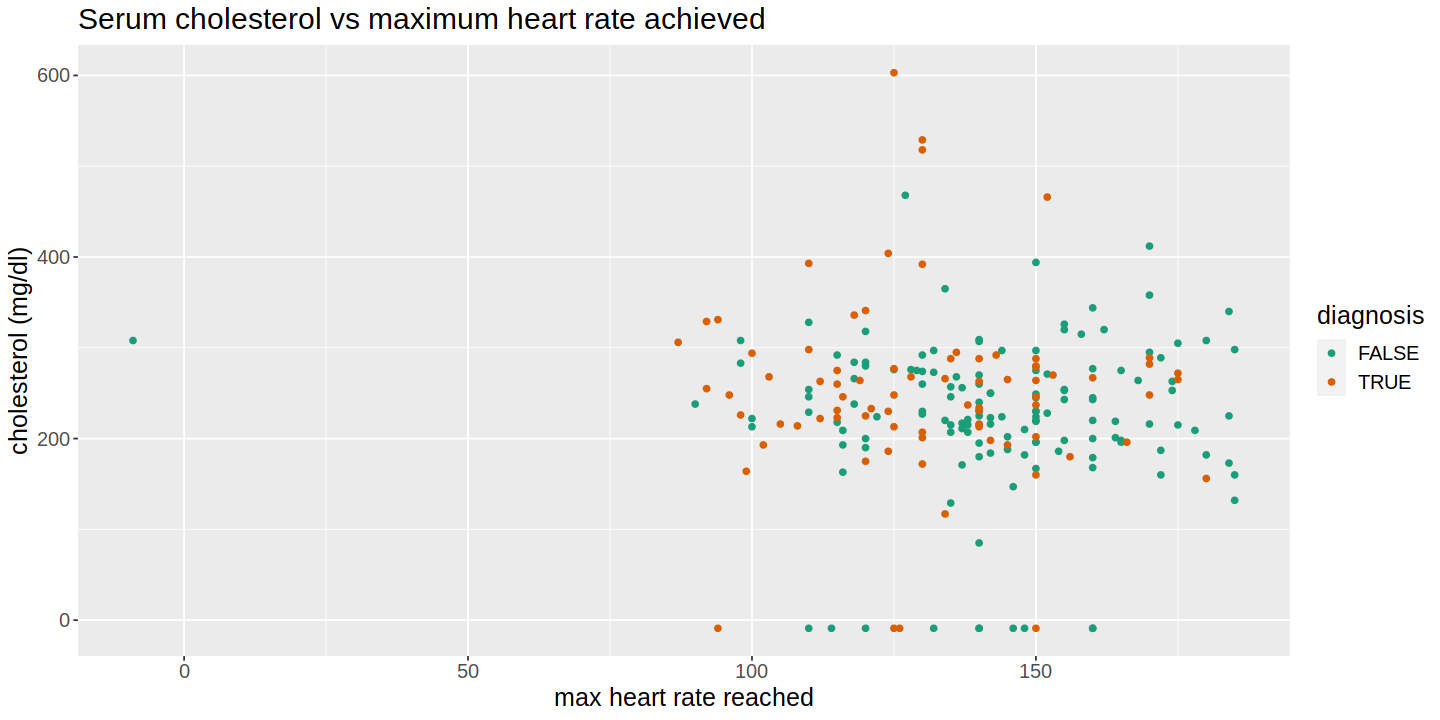

In [6]:
#plotting the training data
chol_thalach <- ggplot(hungarian_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)",
                      color = "diagnosis", title = "Serum cholesterol vs maximum heart rate achieved") +
                 scale_color_brewer(palette = "Dark2") +
                 theme(text = element_text(size = 15))


chol_thalach

Figure 5

The graphical representation depicted in Figure 5 elucidates discernible patterns within the dataset. Notably, individuals afflicted by heart disease (depicted in orange) exhibit a notable tendency towards lower maximum heart rates coupled with elevated cholesterol levels. In contrast, individuals without heart disease (depicted in teal) showcase higher maximum heart rates and a broader spectrum of cholesterol levels.

This visual elucidation serves a dual purpose: firstly, it corroborates the findings articulated in the preceding summary, reinforcing the observed relationships between physiological parameters and heart disease. Additionally, this graphical representation facilitates an examination of the impact of outliers on the presented values. Furthermore, the visualization effectively communicates the dispersion of classes, providing insights into the variability inherent in the dataset.

## Finding the best k value

### Creating the model

To create our model, we need to follow four steps:

1. create a recipe that uses hungarian_training to predict diag, with chol and thalach as predictors.
2. create a specification that uses k-nearest neighbors, with neighbors = tune() to perform cross-validation.
3. split the data into 10 equally sized chunks, known as folds, stratifying by diag.
4. create a workflow combining the first 2 steps, with tune_grid instead of fit.
5. repeat for each validation set for values of 1 ≤  ≤ 100
6. To get the same folds each time, we need to set the seed to 1.

To get the same folds each time, we need to set the seed to 1.

In [13]:
set.seed(1)

# Performing Standardization 
hungarian_recipe <- recipe(diag ~ chol + thalach , data = hungarian_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 10 fold-cross valdiation
hungarian_vfold <- vfold_cv(hungarian_training, v = 10, strata = diag)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() |>
      add_recipe(hungarian_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = hungarian_vfold, grid = gridvals) |>
# Collect metrics, filter for accuracy
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

head(knn_results)

neighbors mean     
1 47        0.6641540
2 48        0.6641540
3 49        0.6641540
4 50        0.6641540
5 41        0.6596085
6 42        0.6596085

Figure 6

Figure 6 encapsulates the outcomes of the k-nearest neighbors (KNN) algorithm at different values of the parameter 'k.' Notably, at instances with 'k = 47', 'k = 48', 'k = 49', and 'k = 50', yield an accuracy of 66.41%. To determine the most optimal value, a meticulous analysis is warranted, prompting the generation of a line graph illustrating the accuracy variations concerning different 'k' values. This graphical representation is instrumental in discerning trends and aiding in the informed selection of the most advantageous 'k' value for the KNN algorithm.

### Visualizing Accuracy

Using geom_line, we will be able to view how "safe" each choice is, that is how big of a difference in accuracy a difference of  ± 1 would cause. To do this, we need to plot a graph of accuracy vs neighbors.

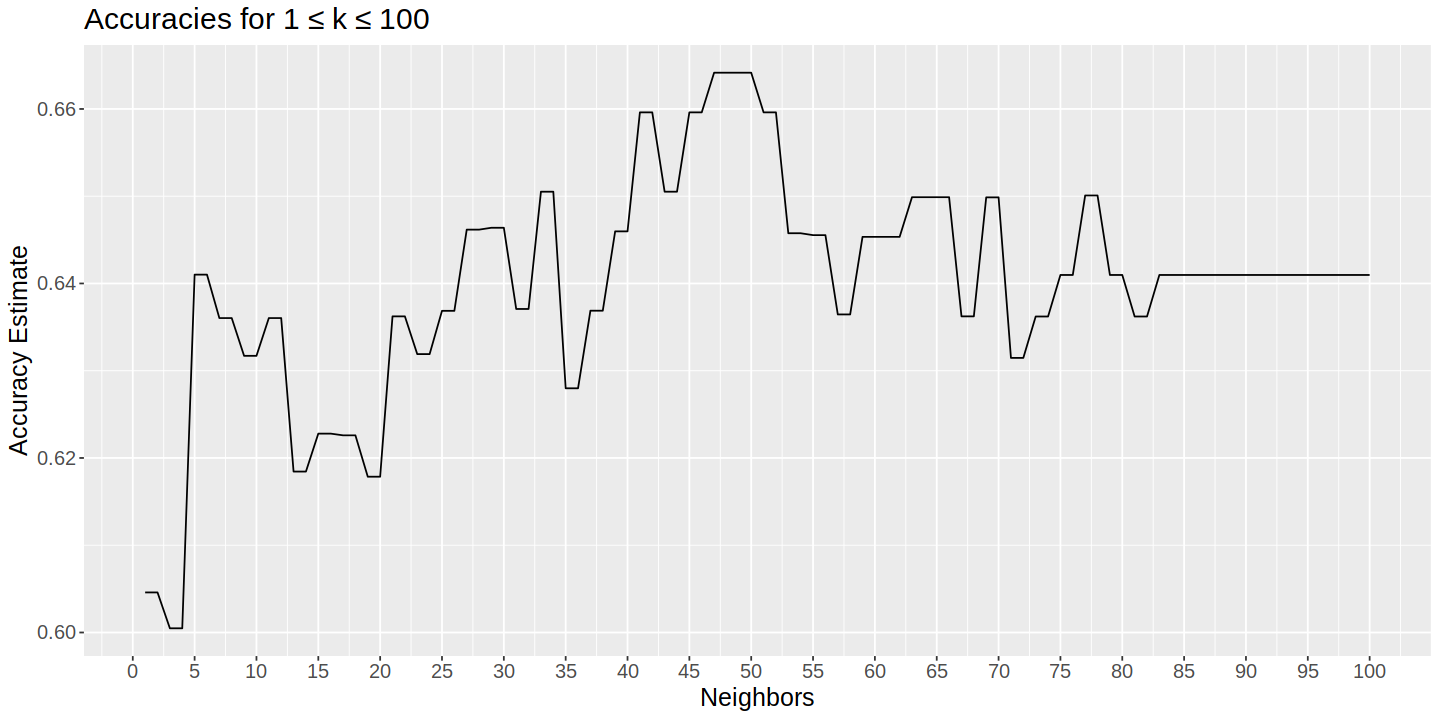

In [14]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      #geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))

accuracy_versus_k

Figure 7

Figure 7 provides a visual examination of the relationship between accuracy and different values of the parameter 'k' in the context of the k-nearest neighbors (KNN) algorithm. Noteworthy observations from the graph indicate that both instances, 'k = 47' and 'k = 48,' exhibit relatively stable and comparable accuracies. The symmetrical declines on either side of these points contribute to a sense of reliability or "safety" in the selection of the optimal 'k' value.

After a judicious consideration of computational efficiency, we opt for 'k = 47' as the preferred choice. This decision is guided by a balance between computational expediency and maintaining a robust accuracy level, making it a pragmatic selection for practical implementation.

### Comparing to a majority classifier

We still, however, need to compare this accuracy to a majority classifier.

To do this, we will group_by diagnosis and summarize to get the percentage of the most abundant class.

In [15]:
#Comparing accuracy of classifier with majority classifier
hungarian_proportions <- hungarian_training |>
    group_by(diag) |>
    summarize(n=n()) |>
    mutate(percent = 100*n/nrow(hungarian_training))
hungarian_proportions

diag  n   percent 
1 FALSE 141 64.09091
2 TRUE   79 35.90909

Figure 8

The information conveyed in Figure 8 underscores a crucial aspect of the dataset's composition. It is discerned that the majority of instances in the training data are attributed to a "FALSE" diagnosis, constituting 64% of the total results. This insight is pivotal as it establishes a baseline reference for the prevalence of negative diagnoses within the dataset.

By recognizing that a "FALSE" diagnosis dominates the majority of the training data, comprising 64% of the instances, it becomes evident that our classifier's accuracy surpasses that of a majority classifier. This acknowledgment is grounded in the understanding that a majority classifier would likely default to predicting the prevalent class, which, in this context, aligns with the "FALSE" diagnosis. The classifier's ability to outperform such a baseline underscores its efficacy in providing accurate predictions beyond a simplistic majority-based approach.

### Building the final model

Now that we have a value for $k$ , we can create our final spec using neighbors = 47. We then fit it to hungarian_training.

In [22]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 47) |>
    set_engine("kknn") |>
    set_mode("classification")

fit <- workflow() |>
    add_recipe(hungarian_recipe) |>
    add_model(final_spec) |>
    fit(data = hungarian_training)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(47,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.35
Best kernel: rectangular
Best k: 47

Marking a significant achievement in our investigation, we have successfully developed a robust and operational model. The meticulous process, encompassing data preprocessing, exploratory analysis, and methodical model development, positions us for subsequent phases. This milestone reflects our commitment to precision and reliability in the domain of cardiovascular health assessment.

### Check for overfitting or underfitting

We still need to check whether out model over/underfits, so we will visualize the regions that the model has assigned to each class. If it does, that means it wouldn't be reliable when using new data to predict.

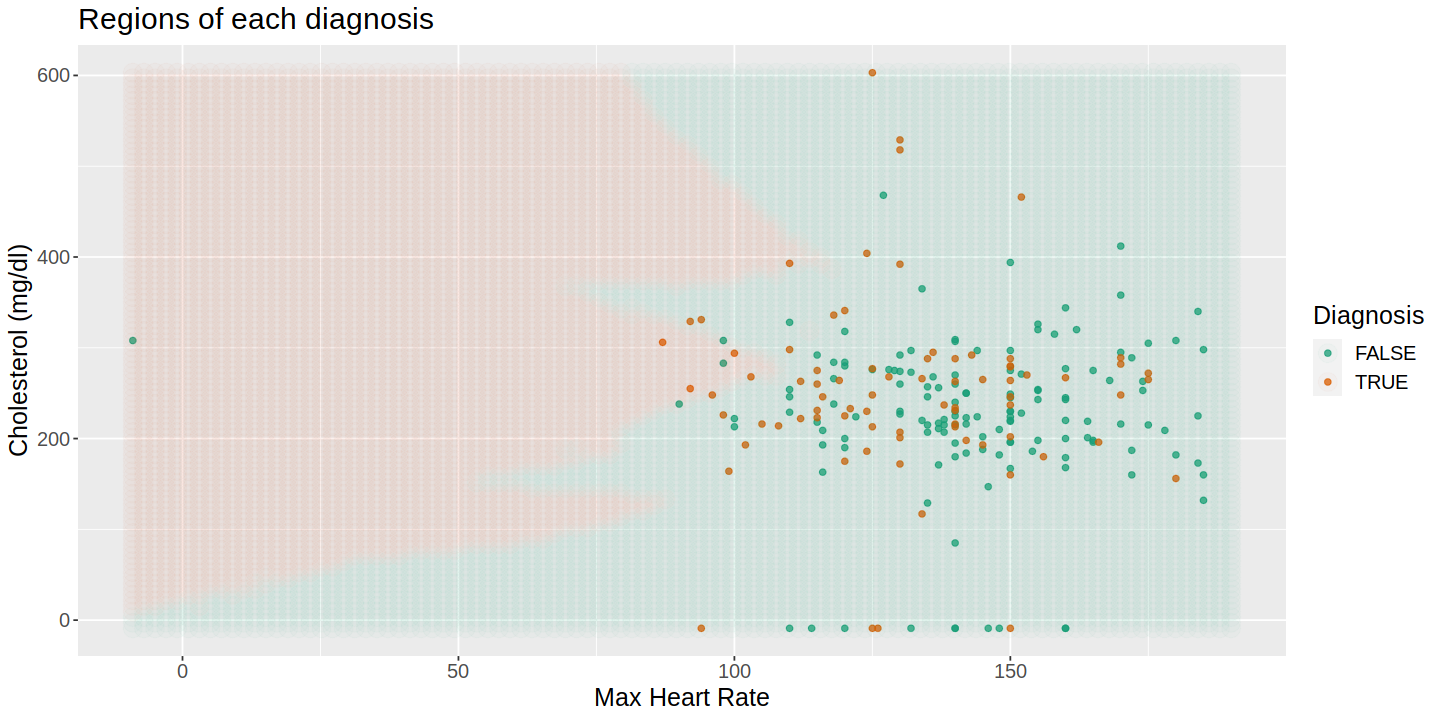

In [23]:
set.seed(1)

#make the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 73) |>
    set_engine("kknn") |>
    set_mode("classification")

#combine the model and recipe in a workflow, retrain the classifier with fit
fit <- workflow() |>
    add_recipe(hungarian_recipe) |>
    add_model(knn_spec) |>
    fit(data = hungarian_training)

#graph with coloured background to check for overfitting/underfitting

thalach_grid <- seq(min(hungarian_clean$thalach), 
                max(hungarian_clean$thalach), 
                length.out = 100)

chol_grid <- seq(min(hungarian_clean$chol), 
                max(hungarian_clean$chol), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(thalach = thalach_grid, 
                                chol = chol_grid))

knnPredGrid <- predict(fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
                    rename(diag = .pred_class)


plot_results <- ggplot() + 
                geom_point(data = hungarian_training, 
                mapping = aes(x = thalach, y = chol, color = diag), 
                alpha = 0.75) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = thalach, 
                           y = chol, 
                           color = diag), 
                           alpha = 0.02, 
                           size = 5) +
                labs(x = "Max Heart Rate", y = "Cholesterol (mg/dl)", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_brewer(palette = "Dark2") +
                theme(text = element_text(size = 15))

plot_results

Figure 9

Upon scrutiny of the presented graph, a subtle indication of overfitting in the classifier is discernible. Despite this observation, there remains a level of confidence in the classifier's predictive capabilities for new data. The recognition of potential overfitting prompts a nuanced consideration of model performance, emphasizing the need for continued vigilance and validation in real-world applications.

### Testing our classifier

#### Accuracy and Confusion Matrix

Now, we will finally use the testing set to look at how our classifier performs when given data it has never seen before.

To do this, we will predict using the same fit as before, but this time with hungarian_testing. We need to look at its accuracy using metrics and its confusion matrix using conf_mat.

In [24]:
set.seed(1)

#predict
predictions <- predict(fit, hungarian_testing) |>
               bind_cols(hungarian_testing)

#find the accuracy of the predictions
metrics<- predictions |>
    metrics(truth = diag, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

#confusion matrix, identifies the areas the model is weak at classifying
conf_mat<- predictions |>
    conf_mat(truth = diag, estimate = .pred_class)

conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.6756757

          Truth
Prediction FALSE TRUE
     FALSE    47   24
     TRUE      0    3

Our classifier demonstrated a 68% accuracy, correctly identifying 50 out of 74 observations. Notably, it displayed a tendency towards overdiagnosis (24 cases). While this inclination may be acceptable in scenarios where the classifier serves as a preliminary screening tool before consulting a medical professional, caution is advised. In the realm of medical diagnostics, prioritizing a cautious approach is paramount.

The introduction of the new column "diag" instead of "num" contributes to an increased level of prudence in both the classifier and its users within the medical field. By amalgamating all potential heart disease diagnoses into a single class (TRUE), the approach mitigates the risk of further misdiagnosis among patients with heart disease. Additionally, this practice diminishes the potential for medical practitioners to exhibit bias in diagnosing patients with a specific severity level of heart disease, addressing a substantial concern prevalent in the medical field.

## DISCUSSION

### Expected findings vs outcome

We are expecting a high accuracy for our classifier, roughly above 60%. This was deduced considering that the visualizations between the predictors and target variables depicted clustering of the data points for each diagnosis (TRUE/FALSE), indicating a relatively strong causal relationship with the target variable. We also aimed for a high accuracy due to the context of the problem, where a misdiagnosis could potentially cost someone their life.

In our proposal, we also expected that a patient prone to heart disease will tend to have higher levels of cholesterol and higher maximum heart rates. As mentioned in the introduction both high cholesterol and high blood pressure is likely due to the patients having clogged arteries and therefore restricted blood flow/blood being pumped which greatly increases the risk of having heart disease. Also we talked about heart disease likelihood is also due to age but we found out that age doesn't matter at all.

Our classifier’s accuracy was around 70%, in accordance with our prediction. The mistakes it made can be attributed to the dataset not being large enough, and therefore there was less data in the training set to train the classifier, and less data in the testing set to assess the classifier's accuracy for each K value. Our visualizations showed that our classifier diagnosed patients with heart disease who tended to have higher levels of cholesterol and higher maximum heart rates.

Our findings are as expected: a patient prone to heart disease tends to have higher levels of cholesterol and higher maximum heart rates. As mentioned in the introduction both high cholesterol and high blood pressure is likely due to the patients having clogged arteries and therefore restricted blood flow/blood being pumped which greatly increases the risk of having heart disease.


### Impact of these findings

Being able to have a classification system for heart disease could make it easier and more accurate for doctors to diagnose patients, resulting in earlier treatment. It could also save doctors time since they already have a clue as to what the diagnosis could be. Therefore, they could spend less time with patients who have a false diagnosis and more with those that have a true one, maximizing the efficiency of the medical system. Having a high level of accuracy in diagnosis is important because a false diagnosis could be fatal. Although the accuracy of the classifier is fairly high, we recommend that it is used as a preliminary prediction prior to visiting a professional, who then can confirm the diagnosis, since it is not perfectly accurate.

What future questions could this lead to?

1. What is the average cholesterol level of a average middle aged person?
2. What other factors other than cholesterol and heart rate impact the chance of a person getting heart disease?
3. What is the mean level of blood pressure in a patient with heart disease?
4. How can we make this classifier more versatile? (i.e. usable in more places)

## Bibliography

Detecting and Treating Heart Failure. (2002, November 1). WebMD. https://www.webmd.com/heart-disease/heart-failure/understanding-heart-failure-treatment.

Preventing & reversing cardiovascular disease. Cleveland Clinic. (n.d.). Retrieved November 6, 2021, from https://my.clevelandclinic.org/health/articles/17385-cardiovascular-disease-prevention--reversal.

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019, April 27). Cardiovascular risks associated with gender and aging. Journal of cardiovascular development and disease. Retrieved November 10, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/.

The creators of the Heart Disease Database are:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.